## 七月在线音乐推荐系统项目特训营结业考试
#### 考试说明:
- 起止时间：<font color=red><b>2020年1月23日10:00 - 2020年1月23日22:00</b></font>，<b>逾期不接受补考</b>
- 考试提交方式：<font color=red><b> 将试卷下载到本地作答</b></font>，本地作答完成后将文件命名为<font color=red><b>"姓名_学号"</b></font>并上传到：http://47.93.208.249:9925/tree/0.Teacher/Exam/Stage1 
- 注意事项：为确保同学们真正了解自身对这次课程的掌握程度，<font color=red><b>请勿翻阅抄袭，移动，更改</b></font>其它同学的试卷，如发现按0分处理。
- 请同学在下方同学姓名处填写自己的姓名，批改人和最终得分处不用填写，试卷总分为100分。

- 同学姓名:lunature
- 批改人：魏天保 
- 最终得分: 90

<center><h1>####答卷开始####</h1></center>

## 一、理论题（30分）

#### 1、协同过滤算法是指基于用户行为数据设计的推荐算法，常见的有UserCF和ItemCF两种，请你分别用一句话概括这两种算法的核心思想。（6分）

In [ ]:
UserCF是指找出与某个用户具有相似兴趣的用户，计算的是用户间的相似度。
ItemCF计算的是item间的相似度，是找出与该item相似度最高的item

<font color=red>-2,没有说明如何根据相似度推荐</font>

#### 2、 矩阵分解属于协同过滤算法吗？（4分）

A 属于

B 不属于

In [ ]:
A

#### 3、分别用一句话概括用户冷启动和物品冷启动的含义。（5分）

In [ ]:
用户冷启动指的是某些用户的相关信息过少从而无法找到与其相似的用户，比如新注册的用户。
物品冷启动指的是某一个物品的相关信息过少，比如新发布的歌曲，还没有人听过，或者一些听众很少的冷门歌曲。

#### 4、分别说出一种用户冷启动和物品冷启动的解决方案。（5分）

In [ ]:
如果新注册的用户没有任何相关信息，可以推荐热门物品。
如果物品的相关信息过少可以推荐类别相似度高的物品，将粒度从物品放大到类别。

#### 5、请说出推荐系统中评分预测和TopN推荐的评价指标，各列举两种。（4分）

In [ ]:
评分预测用回归模型的评价指标，如MSE，RMSE；
topN推荐的评价指标有准确率，召回率等。

#### 6、 写出RMSE的计算公式，并说明公式中每个变量的含义。（6分）

In [ ]:
RMSE为均方根误差，公式为sqrt(mean((y_r-y_p)^2)),y_r为实际值，y_p为预测值。

## 二、代码题（70分）

#### 7、假设你昨天看了 Indiana Jones and the Last Crusade (1989) 这部电影，请使用 surprise 中的 KNNBaseline 为自己推荐5部相似的电影。（10分）

- 使用surprise内置的数据集：ml-100k
- 打印出这5部电影的名称

In [3]:
from surprise import Dataset
data = Dataset.load_builtin('ml-100k')

In [10]:
from surprise import KNNBaseline
trainset = data.build_full_trainset()
sim_options = {'name': 'pearson_baseline', 'user_based': False}
algo = KNNBaseline(sim_options=sim_options)
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [6]:
import os
def read_item_names():
    """
    获取电影名到电影id 和 电影id到电影名的映射
    """

    file_name = (os.path.expanduser('~') + '/.surprise_data/ml-100k/ml-100k/u.item')
    rid_to_name = {}
    name_to_rid = {}
    with open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('|')
            rid_to_name[line[0]] = line[1]
            name_to_rid[line[1]] = line[0]

    return rid_to_name, name_to_rid

In [7]:
rid_to_name, name_to_rid = read_item_names()

In [11]:
toy_story_raw_id = name_to_rid['Indiana Jones and the Last Crusade (1989)']
toy_story_inner_id = algo.trainset.to_inner_iid(toy_story_raw_id)

# 找到最近的5个邻居
toy_story_neighbors = algo.get_neighbors(toy_story_inner_id, k=5)

# 从近邻的id映射回电影名称
toy_story_neighbors = (algo.trainset.to_raw_iid(inner_id) for inner_id in toy_story_neighbors)            
toy_story_neighbors = (rid_to_name[rid] for rid in toy_story_neighbors)
                       
print('The 5 nearest neighbors of Toy Story are:')
for movie in toy_story_neighbors:
    print(movie)

The 5 nearest neighbors of Toy Story are:
Raiders of the Lost Ark (1981)
Back to the Future (1985)
Return of the Jedi (1983)
Independence Day (ID4) (1996)
Star Wars (1977)


<font color=red>要细心哦</font>

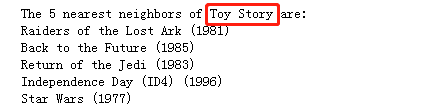

#### 8、加载surprise内置的 movielens 1m 数据集，取每个用户最后一次观影的评分记录，存在变量test中，并展示test的前5条记录（10分）

- 加载数据集：2分
- 获取最后一次观影记录：6分
- 展示任意5个用户的最后一条评分记录：2分

In [13]:
from surprise import Dataset
data_m1 = Dataset.load_builtin('ml-1m')

Dataset ml-1m could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-1m.zip...
Done! Dataset ml-1m has been saved to /Users/Juan/.surprise_data/ml-1m


In [28]:
import pandas as pd
file_name = (os.path.expanduser('~') + '/.surprise_data/ml-1m/ml-1m/ratings.dat')
test_all = pd.read_csv(file_name,sep='::',header=None,names=['UserID','MovieID','Rating','Timestamp'])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
test = test_all.iloc[test_all.groupby(['UserID'])['Timestamp'].idxmax()[:10]].reset_index(drop=True)

In [33]:
test[:5]

,UserID,MovieID,Rating,Timestamp
0,1,48,5,978824351
1,2,1687,3,978300174
2,3,2081,4,978298504
3,4,2951,4,978294282
4,5,288,2,978246585


<font color=red>-1，test中应该存的是每个用户最后一次的观影记录，而不是其中的10个</font>

#### 9、展示 test 中前5个用户的用户ID和观看的电影名称（10分）

In [37]:
import os
def read_item_names():
    """
    获取电影名到电影id 和 电影id到电影名的映射
    """

    file_name = (os.path.expanduser('~') + '/.surprise_data/ml-1m/ml-1m/movies.dat')
    rid_to_name = {}
    name_to_rid = {}
    with open(file_name, 'r', encoding='ISO-8859-1') as f:
        for line in f:
            line = line.split('::')
            rid_to_name[line[0]] = line[1]
            name_to_rid[line[1]] = line[0]

    return rid_to_name, name_to_rid

In [38]:
id_to_name, name_to_id = read_item_names()

In [41]:
test['movie_name'] = test['UserID'][:10].apply(lambda x: id_to_name[str(x)])

In [43]:
test[['UserID','movie_name']][:5]

,UserID,movie_name
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


<font color=red>-6</font>

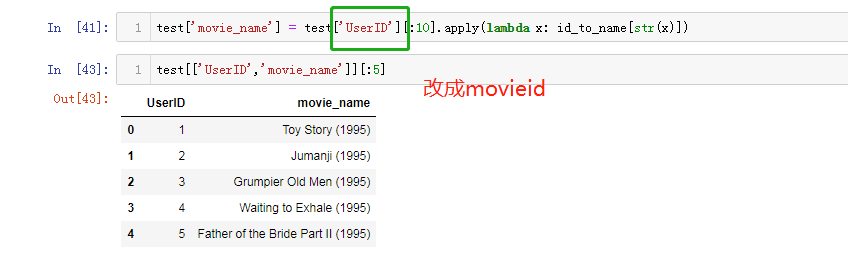

#### 8、请使用gensim库完成电影序列建模，并为test中的前5个用户各推荐10部电影（25分）

- 提示：电影序列数据 movie.seq 位于当前目录下，需要使用 pickle 加载 （4分）
- 要求1：设置电影向量维度为15，代码中要体现模型的保存与加载，模型文件（以"学号.model"命名）需要一并提交 （6分）
- 要求2：推荐时需要打印每个用户的userid和推荐的电影名称以及他们与该用户最后一次观看的电影的相似度。（15分）

In [67]:
import multiprocessing
import gensim
import pickle
movie_seq = pickle.load(open("movie.seq","rb"))

def train_movie2vec(movie_seq, model_file):
    cores = multiprocessing.cpu_count()
    print("using all "+str(cores)+" cores")
    print("Training word2vec model...")
    model = gensim.models.Word2Vec(sentences=movie_seq, size=15, min_count=3, window=7, workers=cores)
    print("Saving model...")
    model.save(model_file)

In [69]:
model_file = "movie2vec.model"
train_movie2vec(movie_seq,model_file)

using all 4 cores
Training word2vec model...
Saving model...


In [76]:
model = gensim.models.Word2Vec.load(model_file)
movie_dic = dict(zip(list(test['UserID'][:5]),list(test['MovieID'])[:5]))
for user_id,movie_id in movie_dic.items():
    result_movie_lst = model.most_similar(str(movie_id))
    print('用户',user_id, ': 推荐电影和相似度为： ')
    for movie in result_movie_lst:
        print('\t',id_to_name[str(movie[0])],movie[1])
    print("\n")

用户 1 : 推荐电影和相似度为： 
	 Maverick (1994) 0.9612661600112915
	 Mask, The (1994) 0.9560416340827942
	 Breathless (1983) 0.9454922676086426
	 How to Make an American Quilt (1995) 0.9437337517738342
	 Drunken Master (Zui quan) (1979) 0.9423815608024597
	 To Die For (1995) 0.940608561038971
	 Seven (Se7en) (1995) 0.9397757053375244
	 Hairspray (1988) 0.9380213022232056
	 Reds (1981) 0.9319344758987427
	 Mortal Kombat (1995) 0.9188282489776611


用户 2 : 推荐电影和相似度为： 
	 Red Corner (1997) 0.9798393845558167
	 Mortal Kombat: Annihilation (1997) 0.9691603779792786
	 Man Who Knew Too Little, The (1997) 0.9441375136375427
	 Mrs. Dalloway (1997) 0.9325694441795349
	 Mummy, The (1932) 0.93058842420578
	 Love Letter, The (1999) 0.9224751591682434
	 Brandon Teena Story, The (1998) 0.9215181469917297
	 Mummy, The (1959) 0.9213235974311829
	 Mummy's Ghost, The (1944) 0.9154181480407715
	 Death Wish II (1982) 0.9149956107139587


用户 3 : 推荐电影和相似度为： 
	 Mighty Ducks, The (1992) 0.9870117902755737
	 101 Dalmatians 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.


#### 9、使用 tensorflow 实现 y=5x-1（15分）

- 提示：假设用户输入x=1，则系统输出应为4
- 要求：x 设计成用户输入，代码可以打印出对应的 y

In [19]:
import tensorflow as tf
def func(x):
    y = tf.multiply(x, 5, name=None)
    y = tf.add(y, -1)
    #print(tf.cast(y,dtype='int32'))
    tf.Session().run
    print(y.eval())

In [20]:
func(3)

ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

In [79]:
tf.multiply(1, 5, name=None)

<tf.Tensor 'Mul_1:0' shape=() dtype=int32>

In [ ]:
x_input_1d = tf.placeholder(dtype=tf.float32, shape=[])

<font color=red>-1,没有设计用户输入，使用input函数即可</font>

In [ ]:
import tensorflow as tf
w = tf.constant(value=5,name='weight',dtype='int32')
b = tf.constant(value=1,name='bias',dtype='int32')
x = tf.placeholder(shape=None, dtype='int32', name='x')
y = x*w-b
with tf.Session()as sess:
    res = sess.run(y, feed_dict={x:int(input('x = '))})
    print('y =',res)